In [24]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

In [25]:
## Reading in the data
fires = pd.read_csv("df_QuarterSector_CA_1992_2018_True3and5Av.csv")
fires.head()

,Sector,Q,Year,Burn,Slr_Tot,MnWndSp_Av,MnWndDir_Av,MaxWndGst,AvAirT_Av,AvAirT_AvDMax,...,AvAirT_Av_5,AvAirT_AvDMax_5,AvAirT_Max_5,AvAirT_AvDMin_5,AvAirT_Min_5,AvHum_Av_5,AvHum_Max_5,AvHum_Min_5,Precip_Tot_5,BurnFrCh
0,0,1,1992,92.2,0.0,0.073278,0.012646,-0.119249,0.061706,0.035769,...,0.061706,0.035769,0.004654,0.097781,0.682232,-0.253551,-0.096265,-0.407430,-0.438836,-0.450850
1,0,2,1992,6457.0,0.0,0.100879,0.062195,0.494236,0.091426,0.088843,...,0.076566,0.062306,0.032547,0.095321,0.360373,-0.183629,-0.041720,-0.387987,-0.478321,-0.469665
2,0,3,1992,74943.7,0.0,0.141522,0.516184,0.184578,0.005348,-0.001681,...,0.052826,0.040977,0.024636,0.065978,0.223777,-0.138329,-0.017073,-0.333035,-0.470012,-0.075560
3,0,4,1992,365.1,0.0,0.135283,0.040399,0.109643,-0.029742,-0.015678,...,0.032184,0.026813,0.018601,0.032827,0.145657,-0.093192,-0.008157,-0.293254,-0.337562,-0.962551
4,0,1,1993,24.4,0.0,0.030207,-0.024922,-0.031629,-0.090862,-0.095361,...,0.007575,0.002378,-0.006838,0.009316,0.028678,-0.039078,-0.003671,-0.106159,-0.297954,-0.854672


In [16]:
## Check for data balance with different thresholds for Burn
area = [1000,1500,2000,2500,3000]
for a in area:
    fires['Fire_a'] = np.where(fires['Burn']<a,0,1)
    print("For area =",a,"\n",fires['Fire_a'].value_counts())

For area = 1000 
 1    340
0    200
Name: Fire_a, dtype: int64
For area = 1500 
 1    314
0    226
Name: Fire_a, dtype: int64
For area = 2000 
 1    295
0    245
Name: Fire_a, dtype: int64
For area = 2500 
 1    275
0    265
Name: Fire_a, dtype: int64
For area = 3000 
 0    282
1    258
Name: Fire_a, dtype: int64


I am going to pick Burn threshold>1500 as that gives a kind of balance dataset. I will not use this with my models to see if I get good precision and recall. This will test if the imbalance of data was causing poor results. 

In [3]:
## Set a fire threshold of 100 acres. Fires under 100 acres not considered fires(0), fires over 100 acres are considered as fires(1)
fires['Fire'] = np.where(fires['Burn']<100,0,1)
## Check if data is balanced
fires['Fire'].value_counts()

1    451
0     89
Name: Fire, dtype: int64

Data is imbalanced, there are 5x more 1s than 0s.

In [4]:
## Check for null values
fires.isnull().sum()

Sector             0
Q                  0
Year               0
Burn               0
Slr_Tot            0
MnWndSp_Av         0
MnWndDir_Av        0
MaxWndGst          0
AvAirT_Av          0
AvAirT_AvDMax      0
AvAirT_Max         0
AvAirT_AvDMin      0
AvAirT_Min         0
AvHum_Av           0
AvHum_Max          0
AvHum_Min          0
Precip_Tot         0
Slr_Tot_3          0
MnWndSp_Av_3       0
MnWndDir_Av_3      0
MaxWndGst_3        0
AvAirT_Av_3        0
AvAirT_AvDMax_3    0
AvAirT_Max_3       0
AvAirT_AvDMin_3    0
AvAirT_Min_3       0
AvHum_Av_3         0
AvHum_Max_3        0
AvHum_Min_3        0
Precip_Tot_3       0
Slr_Tot_5          0
MnWndSp_Av_5       0
MnWndDir_Av_5      0
MaxWndGst_5        0
AvAirT_Av_5        0
AvAirT_AvDMax_5    0
AvAirT_Max_5       0
AvAirT_AvDMin_5    0
AvAirT_Min_5       0
AvHum_Av_5         0
AvHum_Max_5        0
AvHum_Min_5        0
Precip_Tot_5       0
BurnFrCh           0
Fire               0
dtype: int64

There are no null values present. 

In [5]:
fires.head()
#fires['Sector'].value_counts()

,Sector,Q,Year,Burn,Slr_Tot,MnWndSp_Av,MnWndDir_Av,MaxWndGst,AvAirT_Av,AvAirT_AvDMax,...,AvAirT_AvDMax_5,AvAirT_Max_5,AvAirT_AvDMin_5,AvAirT_Min_5,AvHum_Av_5,AvHum_Max_5,AvHum_Min_5,Precip_Tot_5,BurnFrCh,Fire
0,0,1,1992,92.2,0.0,0.073278,0.012646,-0.119249,0.061706,0.035769,...,0.035769,0.004654,0.097781,0.682232,-0.253551,-0.096265,-0.407430,-0.438836,-0.450850,0
1,0,2,1992,6457.0,0.0,0.100879,0.062195,0.494236,0.091426,0.088843,...,0.062306,0.032547,0.095321,0.360373,-0.183629,-0.041720,-0.387987,-0.478321,-0.469665,1
2,0,3,1992,74943.7,0.0,0.141522,0.516184,0.184578,0.005348,-0.001681,...,0.040977,0.024636,0.065978,0.223777,-0.138329,-0.017073,-0.333035,-0.470012,-0.075560,1
3,0,4,1992,365.1,0.0,0.135283,0.040399,0.109643,-0.029742,-0.015678,...,0.026813,0.018601,0.032827,0.145657,-0.093192,-0.008157,-0.293254,-0.337562,-0.962551,1
4,0,1,1993,24.4,0.0,0.030207,-0.024922,-0.031629,-0.090862,-0.095361,...,0.002378,-0.006838,0.009316,0.028678,-0.039078,-0.003671,-0.106159,-0.297954,-0.854672,0


In [6]:
features = fires.columns
features

Index(['Sector', 'Q', 'Year', 'Burn', 'Slr_Tot', 'MnWndSp_Av', 'MnWndDir_Av',
       'MaxWndGst', 'AvAirT_Av', 'AvAirT_AvDMax', 'AvAirT_Max',
       'AvAirT_AvDMin', 'AvAirT_Min', 'AvHum_Av', 'AvHum_Max', 'AvHum_Min',
       'Precip_Tot', 'Slr_Tot_3', 'MnWndSp_Av_3', 'MnWndDir_Av_3',
       'MaxWndGst_3', 'AvAirT_Av_3', 'AvAirT_AvDMax_3', 'AvAirT_Max_3',
       'AvAirT_AvDMin_3', 'AvAirT_Min_3', 'AvHum_Av_3', 'AvHum_Max_3',
       'AvHum_Min_3', 'Precip_Tot_3', 'Slr_Tot_5', 'MnWndSp_Av_5',
       'MnWndDir_Av_5', 'MaxWndGst_5', 'AvAirT_Av_5', 'AvAirT_AvDMax_5',
       'AvAirT_Max_5', 'AvAirT_AvDMin_5', 'AvAirT_Min_5', 'AvHum_Av_5',
       'AvHum_Max_5', 'AvHum_Min_5', 'Precip_Tot_5', 'BurnFrCh', 'Fire'],
      dtype='object')

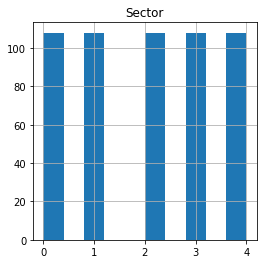

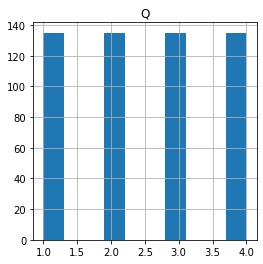

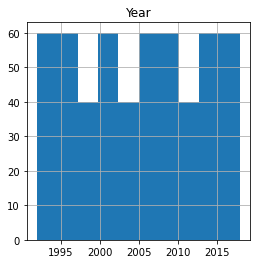

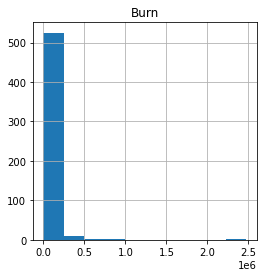

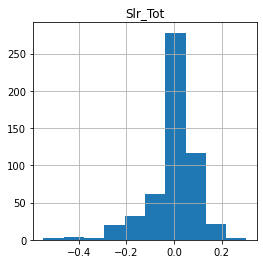

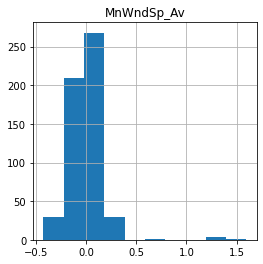

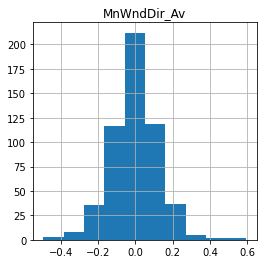

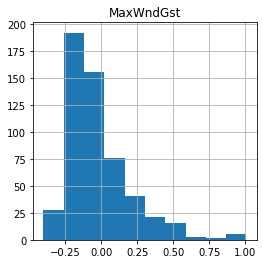

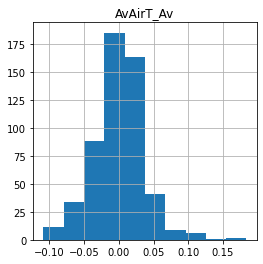

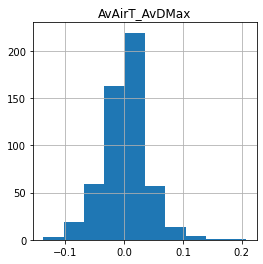

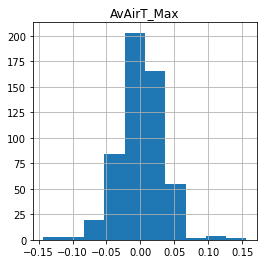

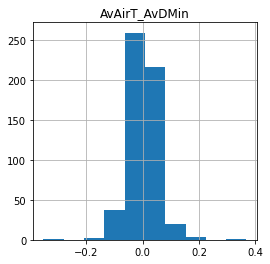

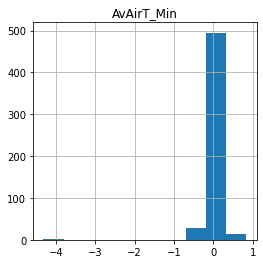

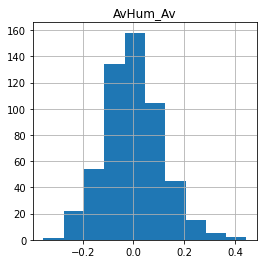

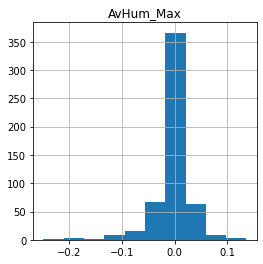

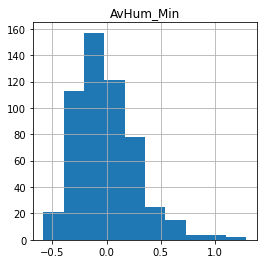

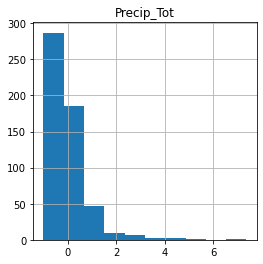

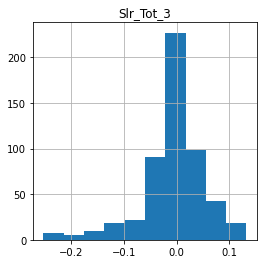

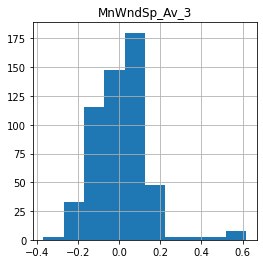

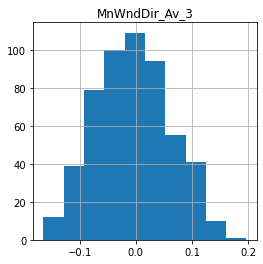

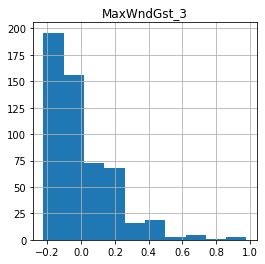

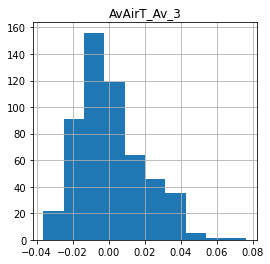

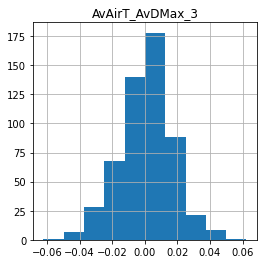

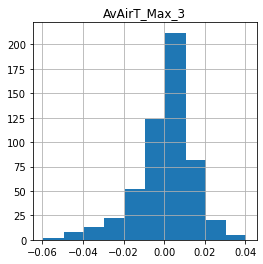

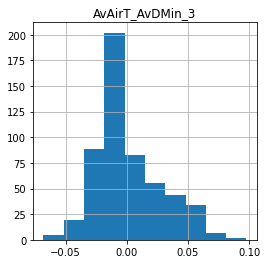

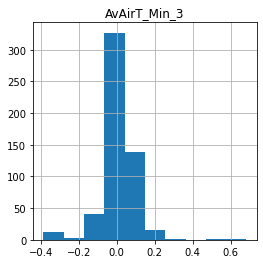

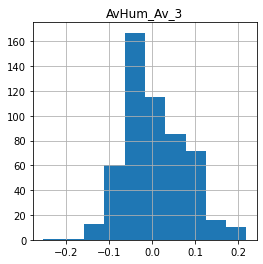

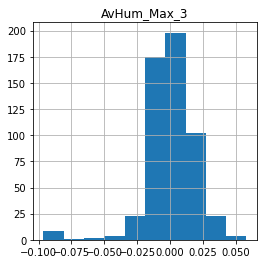

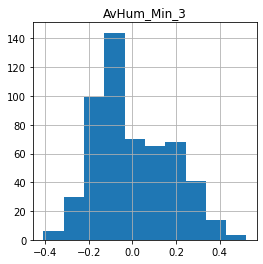

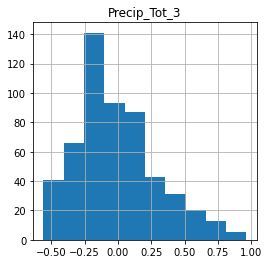

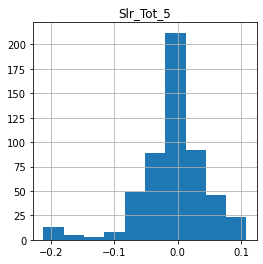

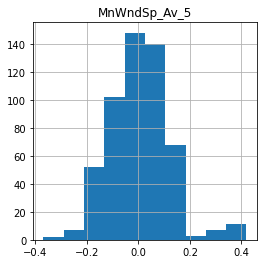

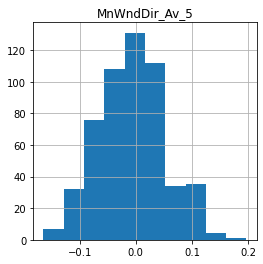

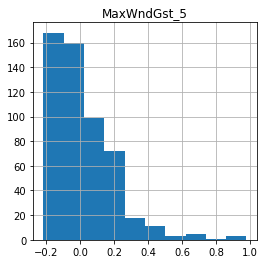

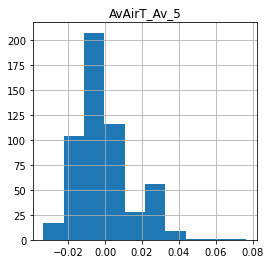

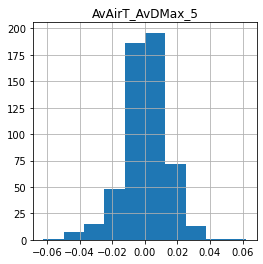

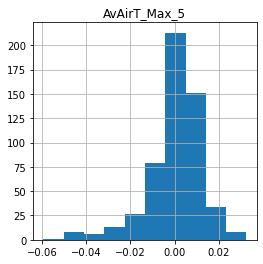

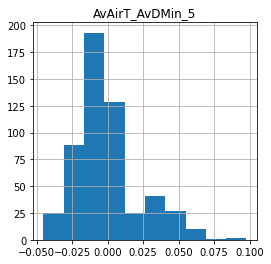

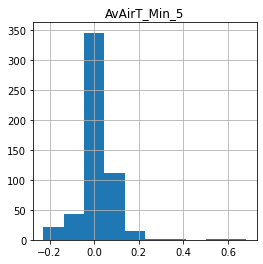

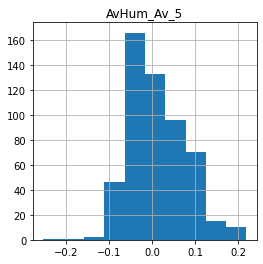

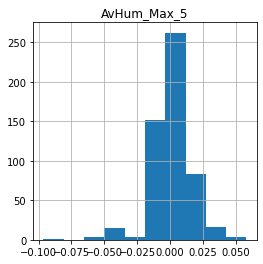

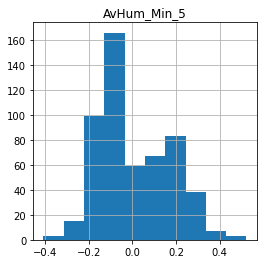

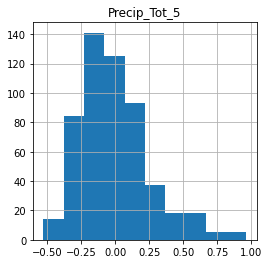

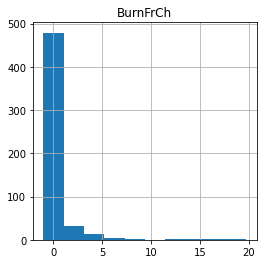

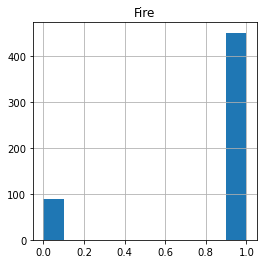

In [7]:
for feat in features:
    plt.figure(figsize=(4,4))
    fires[feat].hist()
    plt.title(feat)
    plt.show()

Following features have outliers:
1. Burn
2. MnWndSp_Av
3. AvAirT_Min
4. AvHum_Max
5. Precip_Tot
6. BurnFrCh
7. AvAirT_Min_3
8. AvHum_Max_3
9. AvAirT_Av_5
10. AvAirT_AvDMin_5
11. AvAirT_Min_5
12. AvHum_Av_5
13. AvHum_Max_5

Following features are skewed in distribution:
1. Burn
2. Slr_Tot
3. MaxWndGst
4. AvHum_Min
5. Precip_Tot
6. Slr_Tot_3
7. MaxWndGst_3
8. AvAirT_Av_3
9. AvAirT_AvDMin_3
10. Precip_Tot_3
11. Slr_Tot_5
12. MaxWndGst_5
13. AvAirT_Max_5
14. AvAirT_AvDMin_5
15. AvHumAv_5
16. Precip_tot_5
17. BurnFrCh



### Feature Selection

In [8]:
X = fires.drop(['Fire'],axis=1)
Y = fires['Fire']

In [9]:
## Train-test split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=614,shuffle=True,stratify=Y) 

In [10]:
## Check for low variance features
features_train = X_train.columns
for feat in features_train:
    threshold = 0.001
    variance = X_train[feat].var()
    if (variance<threshold):
        print(feat, "should be dropped")
drop_cols = (['AvAirT_Av_3','AvAirT_AvDMax_3','AvAirT_Max_3','AvAirT_AvDMin_3','AvHum_Max_3','AvAirT_Av_5','AvAirT_AvDMax_5','AvAirT_Max_5','AvAirT_AvDMin_5','AvHum_Max_5','Burn'])

AvAirT_Av_3 should be dropped
AvAirT_AvDMax_3 should be dropped
AvAirT_Max_3 should be dropped
AvAirT_AvDMin_3 should be dropped
AvHum_Max_3 should be dropped
AvAirT_Av_5 should be dropped
AvAirT_AvDMax_5 should be dropped
AvAirT_Max_5 should be dropped
AvAirT_AvDMin_5 should be dropped
AvHum_Max_5 should be dropped


In [11]:
X_train = X_train.drop(drop_cols,axis=1)

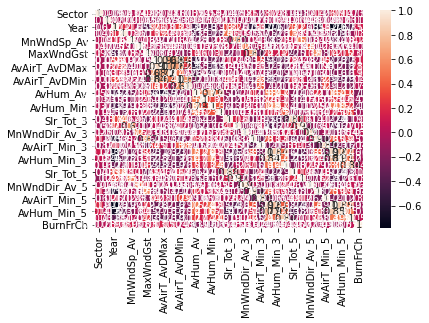

In [12]:
## Check for correlated features
corr = X_train.corr()
sns.heatmap(corr,annot=True)
plt.show()

In [13]:
## Removing highly correlated columns
def correlation(dataframe,threshold):
    col_corr = set()
    corr_matrix = dataframe.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [14]:
correlation(X_train,0.8)

{'AvAirT_AvDMax',
 'AvAirT_AvDMin',
 'AvAirT_Min_5',
 'AvHum_Av_5',
 'AvHum_Min_3',
 'AvHum_Min_5',
 'MaxWndGst_5',
 'MnWndDir_Av_5',
 'MnWndSp_Av_5',
 'Precip_Tot_5',
 'Slr_Tot_5'}

In [15]:
corr_cols = list(correlation(X_train,0.8))
print(corr_cols)

['AvAirT_AvDMax', 'Slr_Tot_5', 'MnWndDir_Av_5', 'Precip_Tot_5', 'MnWndSp_Av_5', 'AvAirT_Min_5', 'AvAirT_AvDMin', 'AvHum_Min_5', 'MaxWndGst_5', 'AvHum_Min_3', 'AvHum_Av_5']


In [16]:
X_train = X_train.drop(corr_cols,axis=1)

In [17]:
X_train.head()

,Sector,Q,Year,Slr_Tot,MnWndSp_Av,MnWndDir_Av,MaxWndGst,AvAirT_Av,AvAirT_Max,AvAirT_Min,...,AvHum_Min,Precip_Tot,Slr_Tot_3,MnWndSp_Av_3,MnWndDir_Av_3,MaxWndGst_3,AvAirT_Min_3,AvHum_Av_3,Precip_Tot_3,BurnFrCh
331,3,4,1993,0.000000,-0.243564,0.065933,-0.053317,-0.014775,0.015961,-0.025125,...,-0.082030,-0.603448,0.000000,-0.193768,-0.032941,0.369336,-0.035731,0.078988,-0.269624,-0.613544
291,2,4,2010,-0.058017,0.034531,0.169547,-0.205049,-0.025234,0.011634,0.007583,...,0.377358,2.265805,0.059508,0.122707,-0.060071,-0.095943,0.054806,-0.025044,0.043322,-0.981002
515,4,4,2012,-0.001174,0.118585,-0.000162,-0.175116,0.047488,0.102112,-0.056746,...,0.002194,-0.241349,0.033980,0.081334,0.015422,-0.185321,0.087207,-0.034424,-0.154952,-0.898640
521,4,2,2014,0.098144,0.141193,-0.089058,-0.209785,0.048172,0.019866,0.115925,...,-0.385332,-0.805203,0.096552,0.061068,-0.044596,-0.195580,0.136698,-0.132835,-0.424965,-0.765779
289,2,2,2010,0.087754,0.123484,0.029991,-0.230435,-0.050926,-0.076538,0.010669,...,0.223505,0.045696,0.057998,0.128992,-0.086209,-0.014535,0.068893,-0.046452,-0.110475,-0.855353


In [18]:
## Selecting features using Information Gain
from sklearn.feature_selection import mutual_info_classif

In [19]:
mutual_info = mutual_info_classif(X_train,Y_train)
mutual_info = pd.Series(mutual_info)

In [20]:
mutual_info.index = X_train.columns

In [21]:
mutual_info.sort_values(ascending=False)

Q                0.193256
AvHum_Max        0.077001
BurnFrCh         0.056202
Precip_Tot       0.040765
AvHum_Av         0.026373
AvAirT_Min       0.022141
MnWndDir_Av_3    0.021433
MnWndSp_Av       0.014903
MaxWndGst        0.014366
AvHum_Min        0.013804
Slr_Tot_3        0.012740
AvAirT_Max       0.008943
Sector           0.008221
AvAirT_Av        0.005239
MaxWndGst_3      0.003700
AvHum_Av_3       0.003618
AvAirT_Min_3     0.001339
Precip_Tot_3     0.000000
MnWndSp_Av_3     0.000000
MnWndDir_Av      0.000000
Slr_Tot          0.000000
Year             0.000000
dtype: float64

In [22]:
## Selecting colums with higher dependence on target
from sklearn.feature_selection import SelectKBest
selected_cols = SelectKBest(mutual_info_classif,k=12)
selected_cols.fit(X_train,Y_train)

SelectKBest(k=12,
            score_func=<function mutual_info_classif at 0x0000017C87F8D048>)

In [23]:
keep_cols = X_train.columns[selected_cols.get_support()]

In [24]:
## Picking only the above 12 columns for further analysis
X_train = X_train[keep_cols]
X_train.head()

,Sector,Q,MnWndSp_Av,MaxWndGst,AvAirT_Max,AvAirT_Min,AvHum_Av,AvHum_Max,AvHum_Min,Precip_Tot,MnWndDir_Av_3,BurnFrCh
331,3,4,-0.243564,-0.053317,0.015961,-0.025125,-0.011608,-0.008812,-0.082030,-0.603448,-0.032941,-0.613544
291,2,4,0.034531,-0.205049,0.011634,0.007583,0.240241,0.013601,0.377358,2.265805,-0.060071,-0.981002
515,4,4,0.118585,-0.175116,0.102112,-0.056746,0.051112,0.012844,0.002194,-0.241349,0.015422,-0.898640
521,4,2,0.141193,-0.209785,0.019866,0.115925,-0.270548,-0.087627,-0.385332,-0.805203,-0.044596,-0.765779
289,2,2,0.123484,-0.230435,-0.076538,0.010669,0.053560,-0.009090,0.223505,0.045696,-0.086209,-0.855353


#### Fixing data imbalance

In [25]:
## Looking at imbalance
Y_train.value_counts()

1    338
0     67
Name: Fire, dtype: int64

In [26]:
from imblearn.over_sampling import RandomOverSampler

In [30]:
ros= RandomOverSampler(0.75)

In [31]:
X_train_ros,Y_train_ros = ros.fit_resample(X_train,Y_train)

In [32]:
Y_train_ros.value_counts()

1    338
0    253
Name: Fire, dtype: int64

In [33]:
X_train_ros.head()

,Sector,Q,MnWndSp_Av,MaxWndGst,AvAirT_Max,AvAirT_Min,AvHum_Av,AvHum_Max,AvHum_Min,Precip_Tot,MnWndDir_Av_3,BurnFrCh
0,3,4,-0.243564,-0.053317,0.015961,-0.025125,-0.011608,-0.008812,-0.082030,-0.603448,-0.032941,-0.613544
1,2,4,0.034531,-0.205049,0.011634,0.007583,0.240241,0.013601,0.377358,2.265805,-0.060071,-0.981002
2,4,4,0.118585,-0.175116,0.102112,-0.056746,0.051112,0.012844,0.002194,-0.241349,0.015422,-0.898640
3,4,2,0.141193,-0.209785,0.019866,0.115925,-0.270548,-0.087627,-0.385332,-0.805203,-0.044596,-0.765779
4,2,2,0.123484,-0.230435,-0.076538,0.010669,0.053560,-0.009090,0.223505,0.045696,-0.086209,-0.855353


In [35]:
fires_train = pd.concat([X_train_ros,Y_train_ros],axis =1)
fires_train.head()

,Sector,Q,MnWndSp_Av,MaxWndGst,AvAirT_Max,AvAirT_Min,AvHum_Av,AvHum_Max,AvHum_Min,Precip_Tot,MnWndDir_Av_3,BurnFrCh,Fire
0,3,4,-0.243564,-0.053317,0.015961,-0.025125,-0.011608,-0.008812,-0.082030,-0.603448,-0.032941,-0.613544,1
1,2,4,0.034531,-0.205049,0.011634,0.007583,0.240241,0.013601,0.377358,2.265805,-0.060071,-0.981002,1
2,4,4,0.118585,-0.175116,0.102112,-0.056746,0.051112,0.012844,0.002194,-0.241349,0.015422,-0.898640,1
3,4,2,0.141193,-0.209785,0.019866,0.115925,-0.270548,-0.087627,-0.385332,-0.805203,-0.044596,-0.765779,1
4,2,2,0.123484,-0.230435,-0.076538,0.010669,0.053560,-0.009090,0.223505,0.045696,-0.086209,-0.855353,1


In [37]:
fires_train.to_csv("fires_train.csv",index=False)

#### Testing with Burn Threshold>1500 to get an inherently balanced dataset

In [26]:
fires.head()

,Sector,Q,Year,Burn,Slr_Tot,MnWndSp_Av,MnWndDir_Av,MaxWndGst,AvAirT_Av,AvAirT_AvDMax,...,AvAirT_Av_5,AvAirT_AvDMax_5,AvAirT_Max_5,AvAirT_AvDMin_5,AvAirT_Min_5,AvHum_Av_5,AvHum_Max_5,AvHum_Min_5,Precip_Tot_5,BurnFrCh
0,0,1,1992,92.2,0.0,0.073278,0.012646,-0.119249,0.061706,0.035769,...,0.061706,0.035769,0.004654,0.097781,0.682232,-0.253551,-0.096265,-0.407430,-0.438836,-0.450850
1,0,2,1992,6457.0,0.0,0.100879,0.062195,0.494236,0.091426,0.088843,...,0.076566,0.062306,0.032547,0.095321,0.360373,-0.183629,-0.041720,-0.387987,-0.478321,-0.469665
2,0,3,1992,74943.7,0.0,0.141522,0.516184,0.184578,0.005348,-0.001681,...,0.052826,0.040977,0.024636,0.065978,0.223777,-0.138329,-0.017073,-0.333035,-0.470012,-0.075560
3,0,4,1992,365.1,0.0,0.135283,0.040399,0.109643,-0.029742,-0.015678,...,0.032184,0.026813,0.018601,0.032827,0.145657,-0.093192,-0.008157,-0.293254,-0.337562,-0.962551
4,0,1,1993,24.4,0.0,0.030207,-0.024922,-0.031629,-0.090862,-0.095361,...,0.007575,0.002378,-0.006838,0.009316,0.028678,-0.039078,-0.003671,-0.106159,-0.297954,-0.854672


In [27]:
fires['Fire'] = np.where(fires['Burn']<1500,0,1)
## Check if data is balanced
fires['Fire'].value_counts()

1    314
0    226
Name: Fire, dtype: int64

In [28]:
X_1500 = fires.drop(['Fire'],axis=1)
Y_1500 = fires['Fire']

In [29]:
## Train-test split
from sklearn.model_selection import train_test_split
X_1500_train,X_1500_test,Y_1500_train,Y_1500_test = train_test_split(X_1500,Y_1500,test_size=0.25,random_state=614,shuffle=True,stratify=Y) 

In [31]:
## Check for low variance features
features_train = X_train.columns
for feat in features_train:
    threshold = 0.001
    variance = X_train[feat].var()
    if (variance<threshold):
        print(feat, "should be dropped")
drop_cols = (['AvAirT_Av_3','AvAirT_AvDMax_3','AvAirT_Max_3','AvAirT_AvDMin_3','AvHum_Max_3','AvAirT_Av_5','AvAirT_AvDMax_5','AvAirT_Max_5','AvAirT_AvDMin_5','AvHum_Max_5','Burn'])

AvAirT_Av_3 should be dropped
AvAirT_AvDMax_3 should be dropped
AvAirT_Max_3 should be dropped
AvAirT_AvDMin_3 should be dropped
AvHum_Max_3 should be dropped
AvAirT_Av_5 should be dropped
AvAirT_AvDMax_5 should be dropped
AvAirT_Max_5 should be dropped
AvAirT_AvDMin_5 should be dropped
AvHum_Max_5 should be dropped


In [33]:
X_1500_train = X_1500_train.drop(drop_cols,axis=1)

In [34]:
## Removing highly correlated columns
def correlation(dataframe,threshold):
    col_corr = set()
    corr_matrix = dataframe.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [35]:
correlation(X_1500_train,0.8)

{'AvAirT_AvDMax',
 'AvAirT_AvDMin',
 'AvAirT_Min_5',
 'AvHum_Av_5',
 'AvHum_Min_3',
 'AvHum_Min_5',
 'MaxWndGst_5',
 'MnWndDir_Av_5',
 'MnWndSp_Av_5',
 'Precip_Tot_5',
 'Slr_Tot_5'}

In [36]:
corr_cols_1500 = list(correlation(X_1500_train,0.8))
print(corr_cols_1500)

['MnWndSp_Av_5', 'Slr_Tot_5', 'AvAirT_AvDMax', 'AvAirT_AvDMin', 'MaxWndGst_5', 'AvHum_Min_3', 'MnWndDir_Av_5', 'AvHum_Av_5', 'AvAirT_Min_5', 'Precip_Tot_5', 'AvHum_Min_5']


In [37]:
X_1500_train = X_1500_train.drop(corr_cols_1500,axis=1)


In [41]:
X_1500_train.head()

,Sector,Q,Year,Slr_Tot,MnWndSp_Av,MnWndDir_Av,MaxWndGst,AvAirT_Av,AvAirT_Max,AvAirT_Min,...,AvHum_Min,Precip_Tot,Slr_Tot_3,MnWndSp_Av_3,MnWndDir_Av_3,MaxWndGst_3,AvAirT_Min_3,AvHum_Av_3,Precip_Tot_3,BurnFrCh
246,2,3,1999,0.012266,-0.051540,0.110910,-0.082534,-0.021119,-0.019712,-0.014543,...,-0.246524,-0.343357,-0.044166,-0.045180,0.083232,-0.070074,-0.004214,0.079303,0.243290,0.487162
456,4,1,1998,0.000000,0.144986,0.221427,0.277522,-0.058352,-0.048597,0.156968,...,0.635558,1.396811,0.000000,0.046082,0.044576,0.192715,-0.338720,0.043350,0.329227,-0.996730
111,1,4,1992,0.000000,0.044108,-0.096947,0.119396,-0.002889,-0.015031,0.020023,...,0.049059,0.285138,0.000000,0.068207,-0.081881,0.722393,0.043208,0.109024,-0.216035,-0.966534
331,3,4,1993,0.000000,-0.243564,0.065933,-0.053317,-0.014775,0.015961,-0.025125,...,-0.082030,-0.603448,0.000000,-0.193768,-0.032941,0.369336,-0.035731,0.078988,-0.269624,-0.613544
436,4,1,1993,0.000000,-0.008933,-0.095778,-0.018462,-0.107447,-0.142860,0.340283,...,1.094343,0.702388,0.000000,-0.063351,-0.090025,0.260755,0.173042,0.179058,0.875558,-0.979010


In [42]:
## Selecting features using Information Gain
from sklearn.feature_selection import mutual_info_classif

In [44]:
mutual_info_1500 = mutual_info_classif(X_1500_train,Y_1500_train)
mutual_info_1500 = pd.Series(mutual_info_1500)

In [45]:
mutual_info_1500.index = X_1500_train.columns

In [46]:
mutual_info_1500.sort_values(ascending=False)

Q                0.266461
BurnFrCh         0.159780
AvHum_Max        0.108447
AvAirT_Max       0.058543
AvAirT_Min       0.054563
Precip_Tot       0.051513
AvAirT_Av        0.040752
MaxWndGst        0.029699
MnWndDir_Av      0.015852
Sector           0.015409
MnWndDir_Av_3    0.009619
Precip_Tot_3     0.001996
AvHum_Min        0.000000
Slr_Tot_3        0.000000
MnWndSp_Av_3     0.000000
MaxWndGst_3      0.000000
AvAirT_Min_3     0.000000
MnWndSp_Av       0.000000
Slr_Tot          0.000000
Year             0.000000
AvHum_Av_3       0.000000
AvHum_Av         0.000000
dtype: float64

In [47]:
## Selecting colums with higher dependence on target
from sklearn.feature_selection import SelectKBest
selected_cols_1500 = SelectKBest(mutual_info_classif,k=12)
selected_cols_1500.fit(X_1500_train,Y_1500_train)

SelectKBest(k=12,
            score_func=<function mutual_info_classif at 0x000001B8BA99F840>)

In [49]:
keep_cols_1500 = X_1500_train.columns[selected_cols_1500.get_support()]

In [50]:
## Picking only the above 12 columns for further analysis
X_1500_train = X_1500_train[keep_cols_1500]
X_1500_train.head()

,Sector,Q,MnWndDir_Av,MaxWndGst,AvAirT_Av,AvAirT_Max,AvAirT_Min,AvHum_Max,Precip_Tot,MnWndDir_Av_3,Precip_Tot_3,BurnFrCh
246,2,3,0.110910,-0.082534,-0.021119,-0.019712,-0.014543,0.039488,-0.343357,0.083232,0.243290,0.487162
456,4,1,0.221427,0.277522,-0.058352,-0.048597,0.156968,0.004735,1.396811,0.044576,0.329227,-0.996730
111,1,4,-0.096947,0.119396,-0.002889,-0.015031,0.020023,0.010821,0.285138,-0.081881,-0.216035,-0.966534
331,3,4,0.065933,-0.053317,-0.014775,0.015961,-0.025125,-0.008812,-0.603448,-0.032941,-0.269624,-0.613544
436,4,1,-0.095778,-0.018462,-0.107447,-0.142860,0.340283,0.005402,0.702388,-0.090025,0.875558,-0.979010


In [51]:
fires_1500_train = pd.concat([X_1500_train,Y_1500_train],axis =1)
fires_1500_train.head()

,Sector,Q,MnWndDir_Av,MaxWndGst,AvAirT_Av,AvAirT_Max,AvAirT_Min,AvHum_Max,Precip_Tot,MnWndDir_Av_3,Precip_Tot_3,BurnFrCh,Fire
246,2,3,0.110910,-0.082534,-0.021119,-0.019712,-0.014543,0.039488,-0.343357,0.083232,0.243290,0.487162,1
456,4,1,0.221427,0.277522,-0.058352,-0.048597,0.156968,0.004735,1.396811,0.044576,0.329227,-0.996730,0
111,1,4,-0.096947,0.119396,-0.002889,-0.015031,0.020023,0.010821,0.285138,-0.081881,-0.216035,-0.966534,0
331,3,4,0.065933,-0.053317,-0.014775,0.015961,-0.025125,-0.008812,-0.603448,-0.032941,-0.269624,-0.613544,0
436,4,1,-0.095778,-0.018462,-0.107447,-0.142860,0.340283,0.005402,0.702388,-0.090025,0.875558,-0.979010,0


In [52]:
fires_1500_train.to_csv("fires_1500_train.csv",index=False)